In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("house_price.csv")

# Display the first few rows of the dataframe
print("First 5 rows of the dataframe:")
print(df.head())

# Get the shape of the dataframe
print("\nShape of the dataframe:", df.shape)

# Get the data types of each column
print("\nData types of each column:")
print(df.dtypes)

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Impute missing values (if any) - replacing with the mean for numerical columns
for column in df.columns:
    if df[column].isnull().any():
        if pd.api.types.is_numeric_dtype(df[column]):
            df[column].fillna(df[column].mean(), inplace=True)
        else:
            df[column].fillna(df[column].mode()[0], inplace=True)

# Verify that there are no missing values after imputation
print("\nMissing values after imputation:")
print(df.isnull().sum())

# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df.describe())

# Distribution of the 'price' column
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Boxplot of 'price' by 'bhk'
plt.figure(figsize=(12, 6))
sns.boxplot(x='bhk', y='price', data=df)
plt.title('House Prices by BHK')
plt.xlabel('BHK')
plt.ylabel('Price')
plt.show()

# Scatter plot of 'total_sqft' vs 'price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_sqft', y='price', data=df)
plt.title('Total Sqft vs Price')
plt.xlabel('Total Sqft')
plt.ylabel('Price')
plt.show()

# Bar plot of value counts for 'location'
plt.figure(figsize=(12, 6))
location_counts = df['location'].value_counts().head(10)  # Displaying top 10 locations
sns.barplot(x=location_counts.index, y=location_counts.values)
plt.title('Top 10 Locations by Count')
plt.xlabel('Location')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45, ha='right')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Shape after removing outliers using Mean and Standard Deviation: (13008, 7)
Shape after capping outliers using Percentile Method: (13200, 7)
Shape after removing outliers using IQR: (11950, 7)
Shape after removing outliers using Z-Score: (13008, 8)


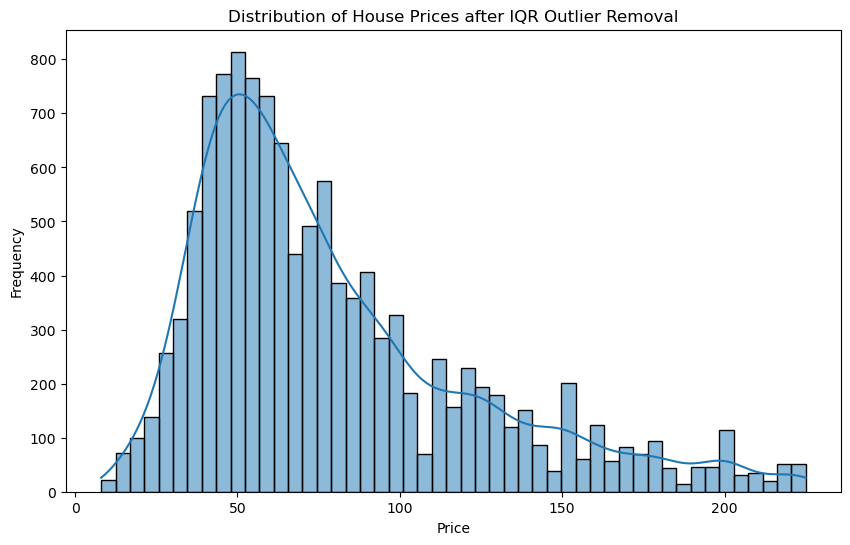

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("house_price.csv")

# Impute missing values (if any) - replacing with the mean for numerical columns
for column in df.columns:
    if df[column].isnull().any():
        if pd.api.types.is_numeric_dtype(df[column]):
            df[column].fillna(df[column].mean(), inplace=True)
        else:
            df[column].fillna(df[column].mode()[0], inplace=True)

# Detect and remove outliers using Mean and Standard Deviation
def remove_outliers_std(df, column, threshold=3):
    mean = df[column].mean()
    std = df[column].std()
    upper_bound = mean + threshold * std
    lower_bound = mean - threshold * std
    df_trimmed = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_trimmed

# Detect and remove outliers using Percentile Method
def remove_outliers_percentile(df, column, lower_percentile=0.05, upper_percentile=0.95):
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)
    df_capped = df.copy()
    df_capped[column] = np.where(df_capped[column] < lower_bound, lower_bound, df_capped[column])
    df_capped[column] = np.where(df_capped[column] > upper_bound, upper_bound, df_capped[column])
    return df_capped

# Detect and remove outliers using IQR (Interquartile Range)
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    df_trimmed = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_trimmed

# Detect and remove outliers using Z-Score
def remove_outliers_zscore(df, column, threshold=3):
    from scipy import stats
    df['zscore'] = np.abs(stats.zscore(df[column]))
    df_trimmed = df[df['zscore'] <= threshold]
    df.drop('zscore', axis=1, inplace=True)
    return df_trimmed

# Apply outlier removal methods
df_std_trimmed = remove_outliers_std(df.copy(), 'price')
df_percentile_capped = remove_outliers_percentile(df.copy(), 'price')
df_iqr_trimmed = remove_outliers_iqr(df.copy(), 'price')
df_zscore_trimmed = remove_outliers_zscore(df.copy(), 'price')

# Display the shape of the dataframe after outlier removal
print("Shape after removing outliers using Mean and Standard Deviation:", df_std_trimmed.shape)
print("Shape after capping outliers using Percentile Method:", df_percentile_capped.shape)
print("Shape after removing outliers using IQR:", df_iqr_trimmed.shape)
print("Shape after removing outliers using Z-Score:", df_zscore_trimmed.shape)

# Example: Plotting the distribution of 'price' after outlier removal using IQR
plt.figure(figsize=(10, 6))
sns.histplot(df_iqr_trimmed['price'], kde=True)
plt.title('Distribution of House Prices after IQR Outlier Removal')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


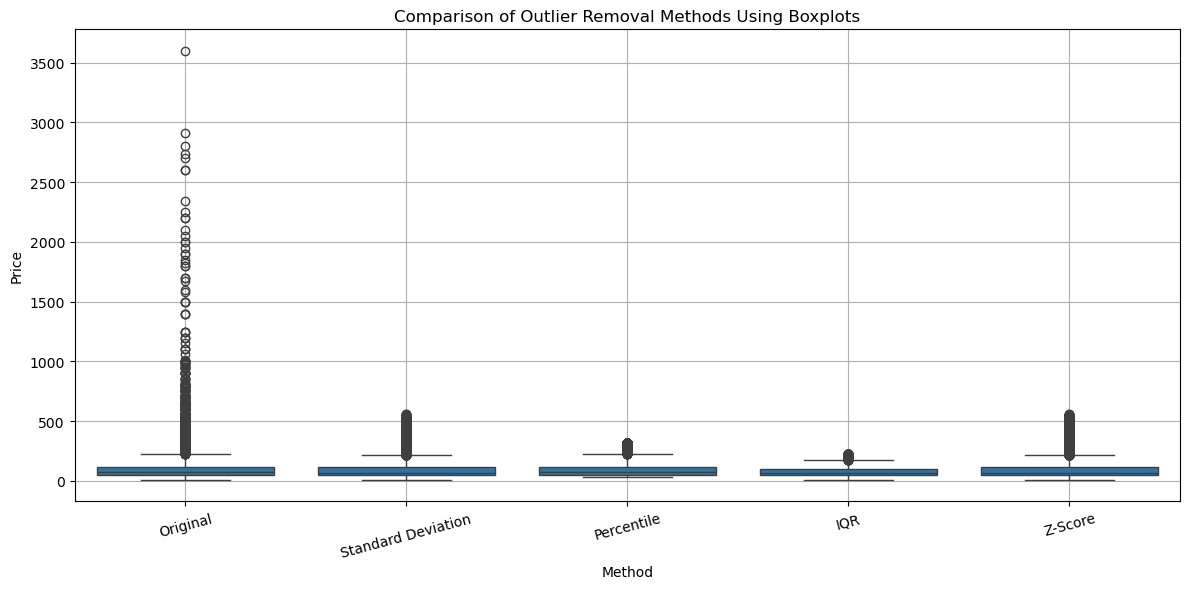

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new DataFrame to hold all versions of 'price' for comparison
price_data = {
    'Original': df['price'],
    'Standard Deviation': df_std_trimmed['price'],
    'Percentile': df_percentile_capped['price'],
    'IQR': df_iqr_trimmed['price'],
    'Z-Score': df_zscore_trimmed['price']
}

# Convert to long format for seaborn
price_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in price_data.items()]))

# Melt the DataFrame for easier plotting
price_melted = price_df.melt(var_name='Method', value_name='Price')

# Plot boxplots for each method
plt.figure(figsize=(12, 6))
sns.boxplot(x='Method', y='Price', data=price_melted)
plt.title('Comparison of Outlier Removal Methods Using Boxplots')
plt.ylabel('Price')
plt.xticks(rotation=15)
plt.grid(True)
plt.tight_layout()
plt.show()


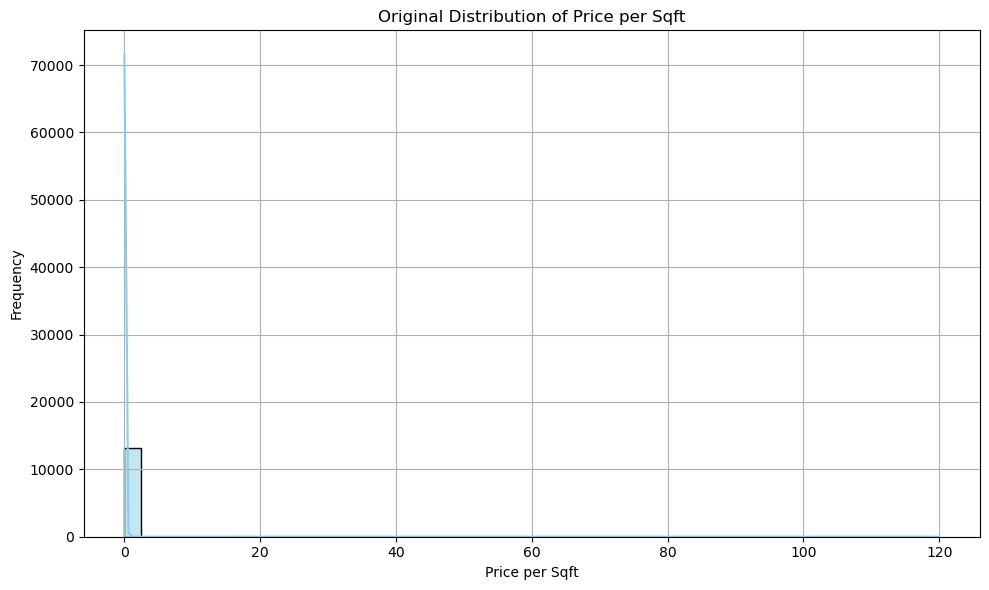

Original Skewness: 108.27
Original Kurtosis: 12090.63


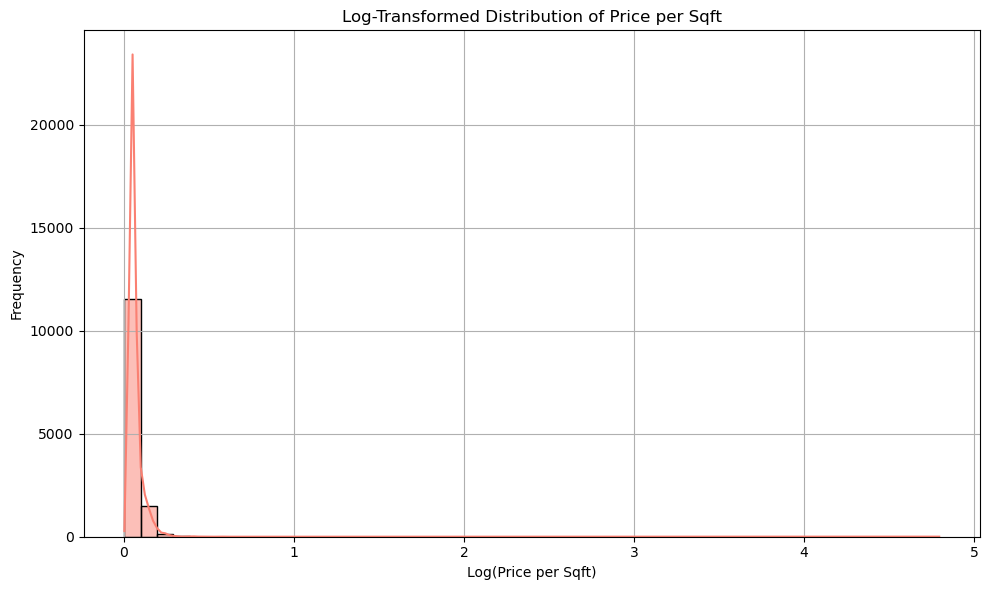

Log-Transformed Skewness: 36.32
Log-Transformed Kurtosis: 2093.82


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

# Create 'price_per_sqft' column
df['price_per_sqft'] = df['price'] / df['total_sqft']

# Plot original distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft'], kde=True, bins=50, color='skyblue')
plt.title('Original Distribution of Price per Sqft')
plt.xlabel('Price per Sqft')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Skewness and Kurtosis before transformation
original_skewness = skew(df['price_per_sqft'], nan_policy='omit')
original_kurtosis = kurtosis(df['price_per_sqft'], nan_policy='omit')
print(f"Original Skewness: {original_skewness:.2f}")
print(f"Original Kurtosis: {original_kurtosis:.2f}")

# Apply log transformation (add small constant to avoid log(0))
df['price_per_sqft_log'] = np.log1p(df['price_per_sqft'])

# Plot transformed distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft_log'], kde=True, bins=50, color='salmon')
plt.title('Log-Transformed Distribution of Price per Sqft')
plt.xlabel('Log(Price per Sqft)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Skewness and Kurtosis after transformation
log_skewness = skew(df['price_per_sqft_log'], nan_policy='omit')
log_kurtosis = kurtosis(df['price_per_sqft_log'], nan_policy='omit')
print(f"Log-Transformed Skewness: {log_skewness:.2f}")
print(f"Log-Transformed Kurtosis: {log_kurtosis:.2f}")


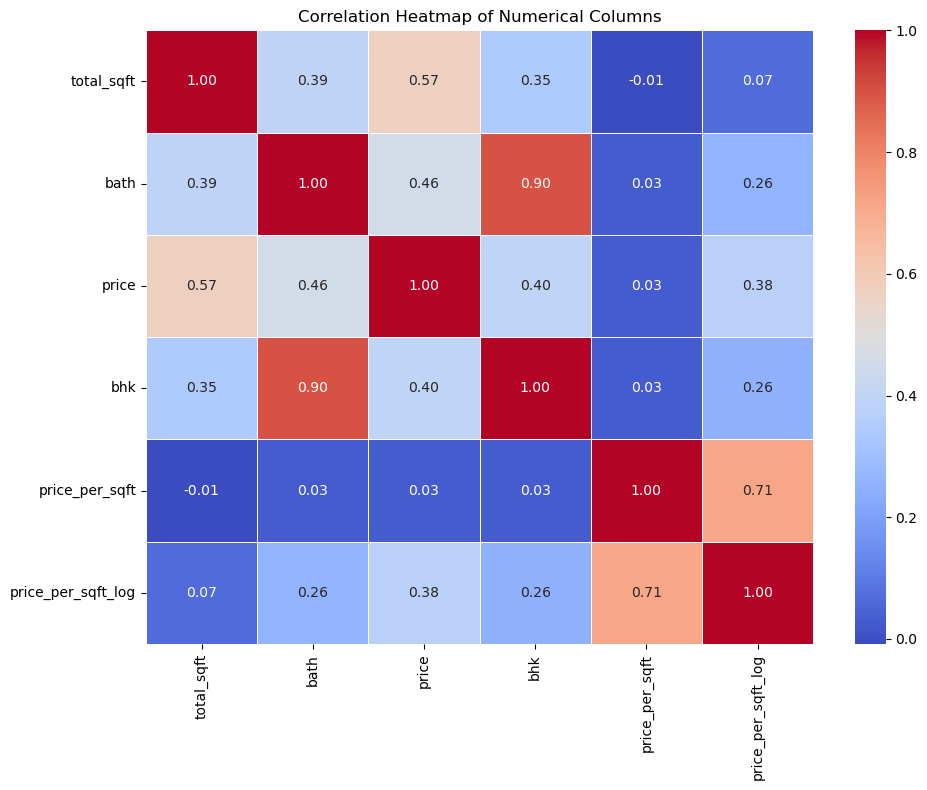

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df already exists and is cleaned (missing values handled)

# Select numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
correlation_matrix = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.tight_layout()
plt.show()

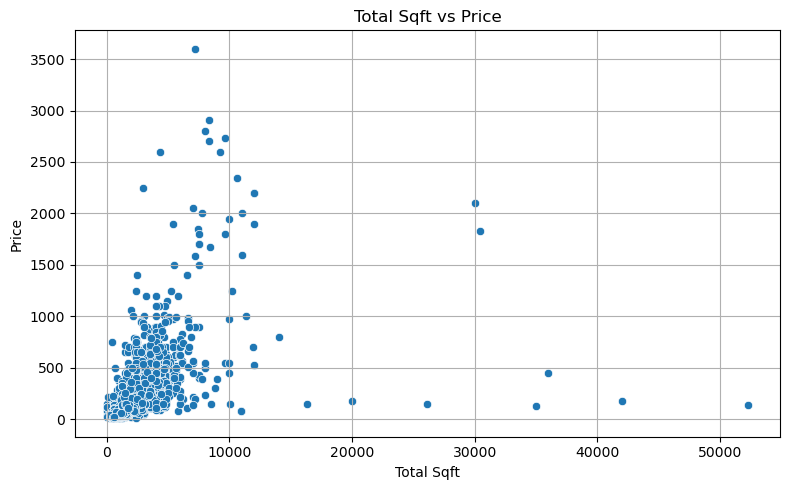

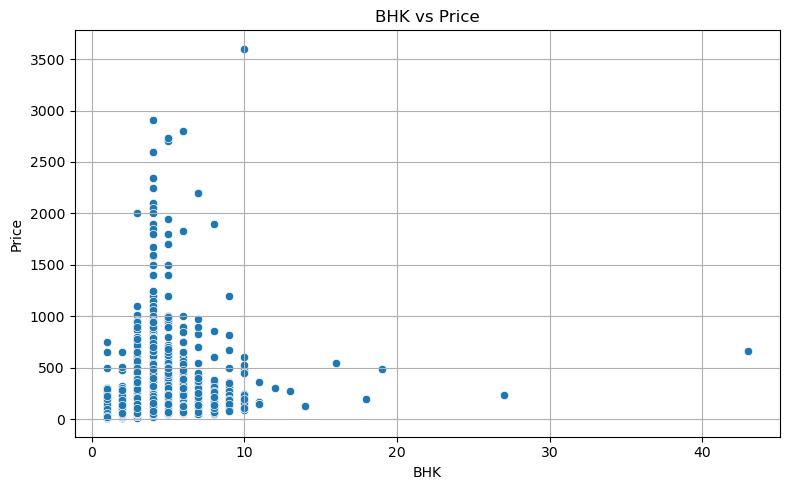

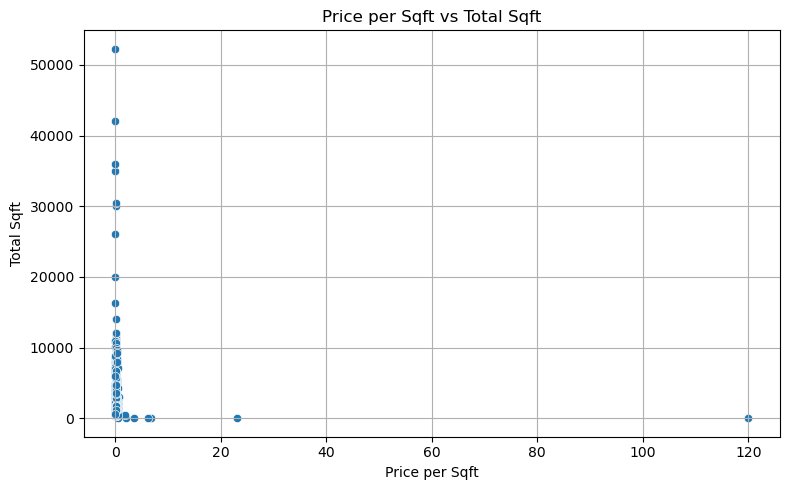

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter Plot: Total Sqft vs Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x='total_sqft', y='price', data=df)
plt.title('Total Sqft vs Price')
plt.xlabel('Total Sqft')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter Plot: BHK vs Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x='bhk', y='price', data=df)
plt.title('BHK vs Price')
plt.xlabel('BHK')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter Plot: Price per Sqft vs Total Sqft
plt.figure(figsize=(8, 5))
sns.scatterplot(x='price_per_sqft', y='total_sqft', data=df)
plt.title('Price per Sqft vs Total Sqft')
plt.xlabel('Price per Sqft')
plt.ylabel('Total Sqft')
plt.grid(True)
plt.tight_layout()
plt.show()
